In [1]:
# import all libraries and modules needed
import os
import sys
import datetime
import glob
import keras
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD
import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
keras.__version__

'1.2.2'

In [3]:
tensorflow.__version__

'0.12.0'

In [4]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

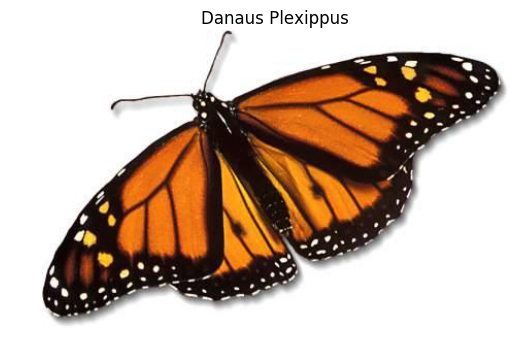

In [5]:
img = load_img('data/train/Danaus_Plexippus/001_0022.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Danaus Plexippus')
plt.show()

In [6]:
x = img_to_array(img)
x2 = x.reshape((1,) + x.shape)

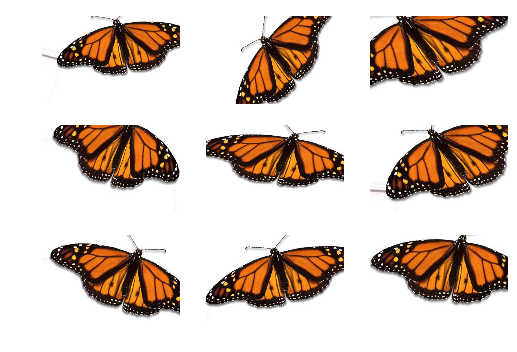

In [7]:
i = 0
fig = plt.figure()
plt.title('Pre-processed')
for batch in datagen.flow(x2, batch_size = 1):
    i += 1
    if i > 9:
        break
    temp = batch.reshape(x.shape)
    plt.subplot(3, 3, i)
    plt.imshow(temp.astype('uint8'))
    plt.axis('off')
plt.show()

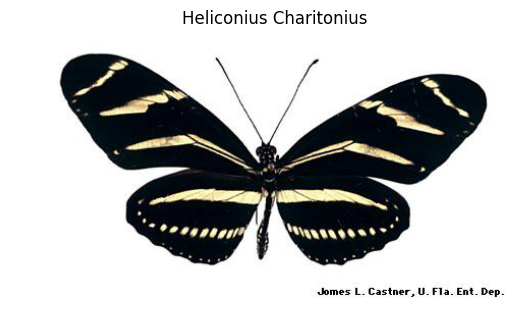

In [8]:
img = load_img('data/train/Heliconius_Charitonius/002_0087.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Heliconius Charitonius')
plt.show()

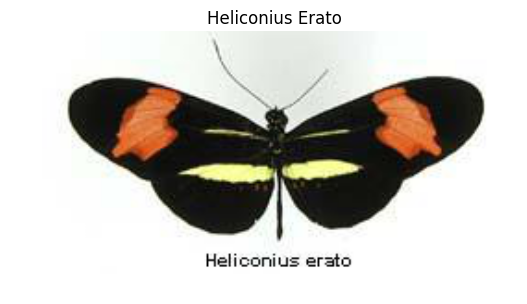

In [9]:
img = load_img('data/train/Heliconius_Erato/003_0020.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Heliconius Erato')
plt.show()

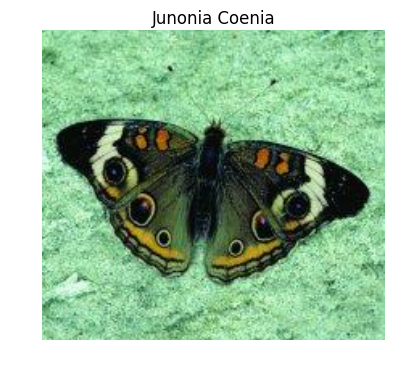

In [10]:
img = load_img('data/train/Junonia_Coenia/004_0041.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Junonia Coenia')
plt.show()

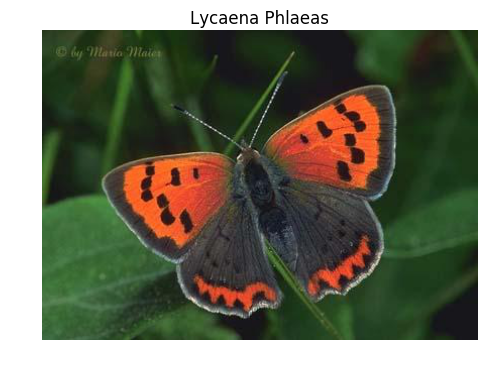

In [11]:
img = load_img('data/train/Lycaena_Phlaeas/005_0010.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Lycaena Phlaeas')
plt.show()

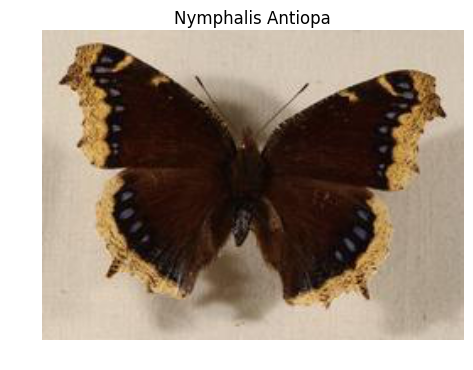

In [12]:
img = load_img('data/train/Nymphalis_Antiopa/006_0061.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Nymphalis Antiopa')
plt.show()

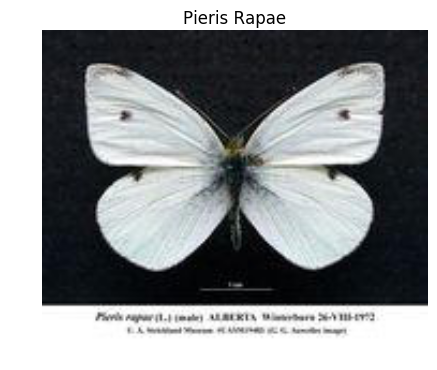

In [13]:
img = load_img('data/train/Pieris_Rapae/008_0024.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Pieris Rapae')
plt.show()

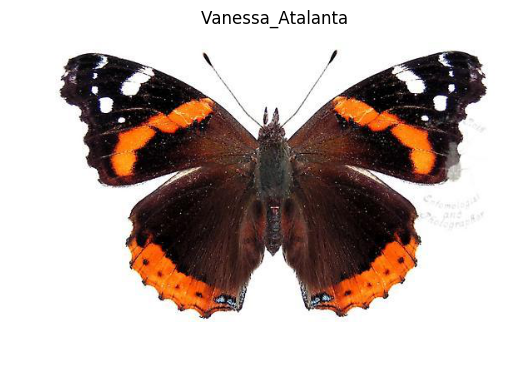

In [14]:
img = load_img('data/train/Vanessa_Atalanta/009_0018.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Vanessa_Atalanta')
plt.show()

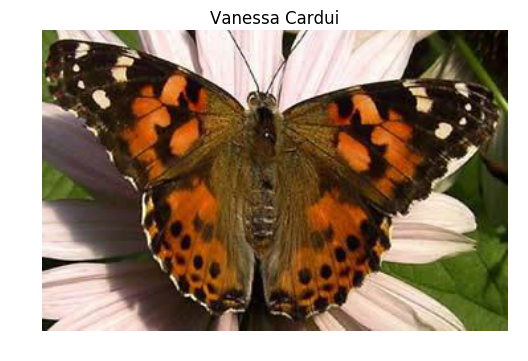

In [15]:
img = load_img('data/train/Vanessa_Cardui/010_0038.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Vanessa Cardui')
plt.show()

In [16]:
# default settings
img_width, img_height = 224, 224

train_dir = 'data/train'
validate_dir = 'data/validate'
nb_epochs = 20
batch_size = 32
nb_classes = len(glob.glob(train_dir + '/*'))

In [17]:
# get number of images in training directory
nb_train_samples = 0
for r, dirs, files in os.walk(train_dir):
    for dr in dirs:
        nb_train_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_train_samples)

632


In [18]:
# get number of images in validation directory
nb_validate_samples = 0
for r, dirs, files in os.walk(validate_dir):
    for dr in dirs:
        nb_validate_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_validate_samples)

244


In [19]:
# data pre-processing for training
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [20]:
# data pre-processing for validating
validate_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [21]:
# generate and store training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 632 images belonging to 10 classes.


In [22]:
# generate and store validation data
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 244 images belonging to 10 classes.


In [23]:
# set up transfer learning on pre-trained ImageNet VGG19 model - remove fully connected layer and replace
# with softmax for classifying 10 classes
vgg19_model = VGG19(weights = 'imagenet', include_top = False)
x = vgg19_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(nb_classes, activation = 'softmax')(x)
model = Model(input = vgg19_model.input, output = predictions)

In [24]:
# freeze all layers of the pre-trained model
for layer in vgg19_model.layers:
    layer.trainable = False

In [25]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [26]:
# fit the model, log the results and the training time
now = datetime.datetime.now
t = now()
transfer_learning_history = model.fit_generator(
    train_generator,
    nb_epoch = nb_epochs,
    samples_per_epoch = nb_train_samples,
    validation_data = validate_generator,
    nb_val_samples = nb_validate_samples,
    class_weight='auto')
print('Training time: %s' % (now() - t))

Epoch 1/20
632/632 [==============================] - 500s - loss: 2.0360 - acc: 0.2896 - val_loss: 2.1164 - val_acc: 0.1107
Epoch 2/20
632/632 [==============================] - 498s - loss: 1.5122 - acc: 0.5063 - val_loss: 1.4837 - val_acc: 0.5369
Epoch 3/20
632/632 [==============================] - 501s - loss: 1.1740 - acc: 0.6899 - val_loss: 1.4566 - val_acc: 0.5287
Epoch 4/20
632/632 [==============================] - 500s - loss: 0.9428 - acc: 0.7373 - val_loss: 0.9158 - val_acc: 0.7664
Epoch 5/20
632/632 [==============================] - 499s - loss: 0.7911 - acc: 0.7785 - val_loss: 0.7769 - val_acc: 0.8115
Epoch 6/20
632/632 [==============================] - 499s - loss: 0.6606 - acc: 0.8228 - val_loss: 0.9221 - val_acc: 0.6352
Epoch 7/20
632/632 [==============================] - 501s - loss: 0.5834 - acc: 0.8402 - val_loss: 0.7814 - val_acc: 0.7254
Epoch 8/20
632/632 [==============================] - 499s - loss: 0.5173 - acc: 0.8354 - val_loss: 0.5627 - val_acc: 0.8361


In [27]:
# evaluate the performance the new model and report the results
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size, pickle_safe=False)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.43328499794
Test Accuracy: 0.84375


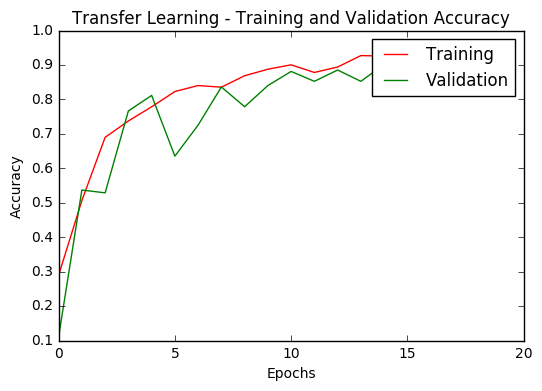

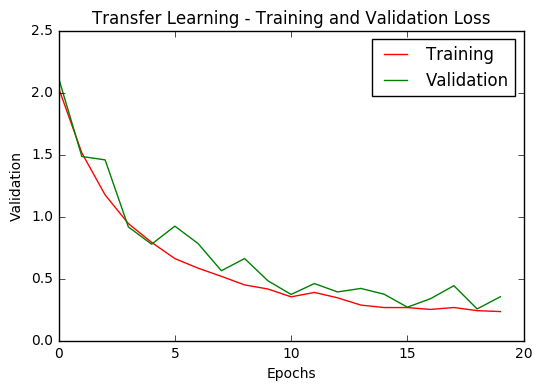

In [28]:
# plot the accuracy and loss data
xfer_acc = transfer_learning_history.history['acc']
val_acc = transfer_learning_history.history['val_acc']
xfer_loss = transfer_learning_history.history['loss']
val_loss = transfer_learning_history.history['val_loss']
epochs = range(len(xfer_acc))

plt.figure()
plt.plot(epochs, xfer_acc, 'r-', label = 'Training')
plt.plot(epochs, val_acc, 'g-', label = 'Validation')
plt.title('Transfer Learning - Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, xfer_loss, 'r-', label = 'Training')
plt.plot(epochs, val_loss, 'g-', label = 'Validation')
plt.title('Transfer Learning - Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Validation")
plt.legend()
plt.show()

In [29]:
# display the layers in the pretrained model
for i, layer in enumerate(vgg19_model.layers):
   print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool


In [30]:
# display the details of the model
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, None, None, 64 1792        input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, None, None, 64 36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, None, None, 64 0           block1_conv2[0][0]               
___________________________________________________________________________________________

In [31]:
# Step 1 - Set up fine tuning on pre-trained ImageNet VGG19 model - train all layers
for layer in model.layers:
    layer.trainable = True

# Step 2 - Compile the revised model using SGD optimizer with a learing rate of 0.0001 and a momentum of 0.9
model.compile(optimizer = SGD(lr = 0.0001, momentum=0.9), 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Step 3 - Fit the revised model, log the results and the training time
now = datetime.datetime.now
t = now()
fine_tuning_history = model.fit_generator(
    train_generator,
    nb_epoch = nb_epochs,
    samples_per_epoch = nb_train_samples,
    validation_data = validate_generator,
    nb_val_samples = nb_validate_samples,
    class_weight='auto')
print('Training time: %s' % (now() - t))

Epoch 1/20
632/632 [==============================] - 1214s - loss: 0.1209 - acc: 0.9668 - val_loss: 0.1094 - val_acc: 0.9672
Epoch 2/20
632/632 [==============================] - 1203s - loss: 0.0592 - acc: 0.9889 - val_loss: 0.1242 - val_acc: 0.9508
Epoch 3/20
632/632 [==============================] - 1206s - loss: 0.0524 - acc: 0.9905 - val_loss: 0.1083 - val_acc: 0.9590
Epoch 4/20
632/632 [==============================] - 1208s - loss: 0.0450 - acc: 0.9858 - val_loss: 0.0809 - val_acc: 0.9754
Epoch 5/20
632/632 [==============================] - 1207s - loss: 0.0403 - acc: 0.9921 - val_loss: 0.0885 - val_acc: 0.9754
Epoch 6/20
632/632 [==============================] - 1208s - loss: 0.0200 - acc: 0.9953 - val_loss: 0.0517 - val_acc: 0.9877
Epoch 7/20
632/632 [==============================] - 1205s - loss: 0.0165 - acc: 0.9984 - val_loss: 0.0692 - val_acc: 0.9795
Epoch 8/20
632/632 [==============================] - 1252s - loss: 0.0170 - acc: 0.9953 - val_loss: 0.0835 - val_acc:

In [32]:
# evaluate the performance the revised model and report the results
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size, pickle_safe=False)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.0378320626915
Test Accuracy: 0.96875


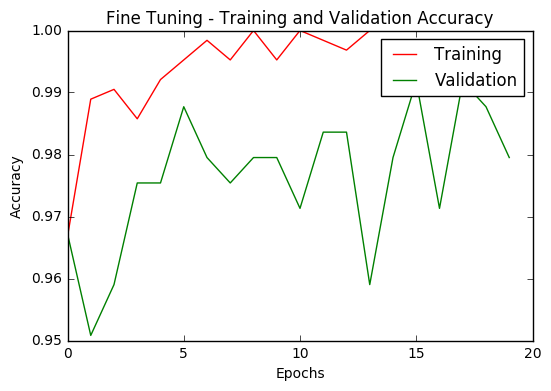

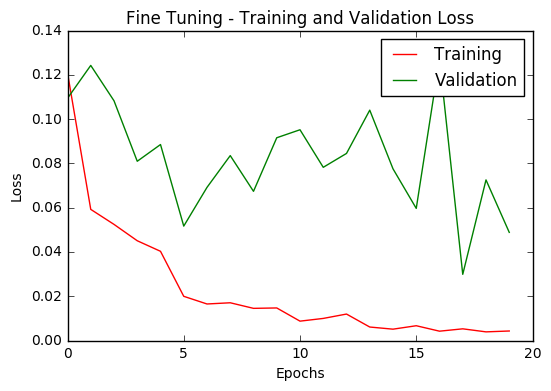

In [33]:
# plot the accuracy and loss data
ft_acc = fine_tuning_history.history['acc']
val_acc = fine_tuning_history.history['val_acc']
ft_loss = fine_tuning_history.history['loss']
val_loss = fine_tuning_history.history['val_loss']
epochs = range(len(ft_acc))

plt.plot(epochs, ft_acc, 'r-', label = 'Training')
plt.plot(epochs, val_acc, 'g-', label = 'Validation')
plt.title('Fine Tuning - Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, ft_loss, 'r-', label = 'Training')
plt.plot(epochs, val_loss, 'g-', label = 'Validation')
plt.title('Fine Tuning - Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()